In [38]:
import os, sys, glob
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import geoplot.crs as gcrs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Vector data 

From [Natural Earth](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/110m_cultural.zip)

In [17]:
cities = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip")

In [2]:
countries = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip')

In [3]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [18]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13000 49.61166)


## Making Maps

Text(0.5, 1, 'World Map')

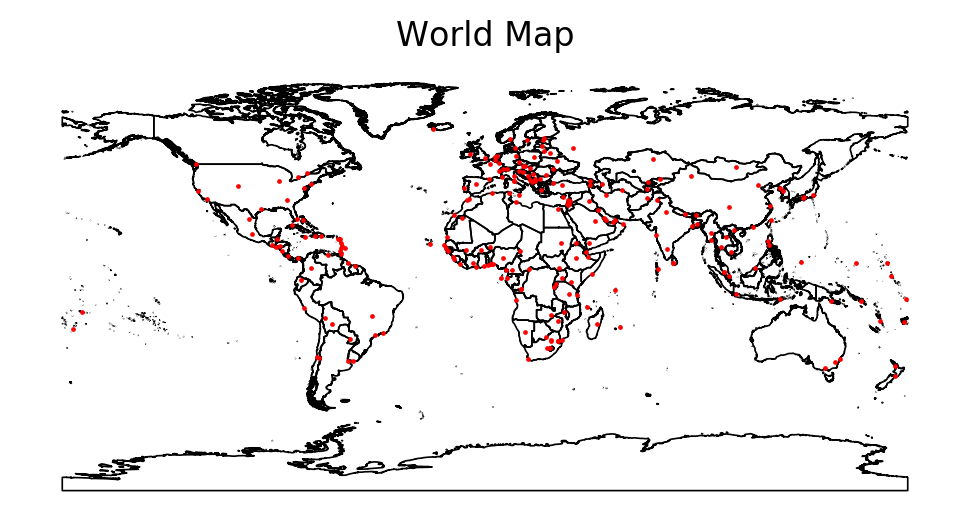

In [20]:
f, ax = plt.subplots(dpi = 200)
countries.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
cities.plot(markersize = 0.5, facecolor = 'red', ax = ax)
ax.set_title('World Map')
ax.set_axis_off()

## Static Webmaps

/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/geoplot/geoplot.py:685: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


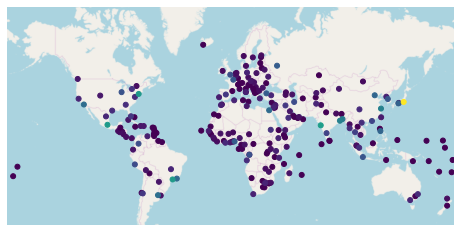

In [36]:
ax = gplt.webmap(countries, projection=gplt.crs.WebMercator())
gplt.pointplot(cities, ax=ax, hue = 'POP2015')

## Aside on Projections

Map projections flatten a globe's surface onto a 2D plane. This necessarily distorts the surface (one of Gauss' lesser known results), so one must choose specific form of 'acceptable' distortion.

By convention, the standard projection in GIS is World Geodesic System(lat/lon - `WGS84`). This is a cylindrical projection, which stretches distances east-west and *results in incorrect distance and areal calculations*. For accurate distance and area calculations, try to use UTM (which divides map into zones). See [epsg.io](epsg.io)

In [8]:
countries.crs

{'init': 'epsg:4326'}

In [10]:
countries_2 = countries.copy()
countries_2 = countries_2.to_crs({'init': 'epsg:3035'})

Text(0.5, 1, 'World Map - \n Lambert Azimuthal Equal Area')

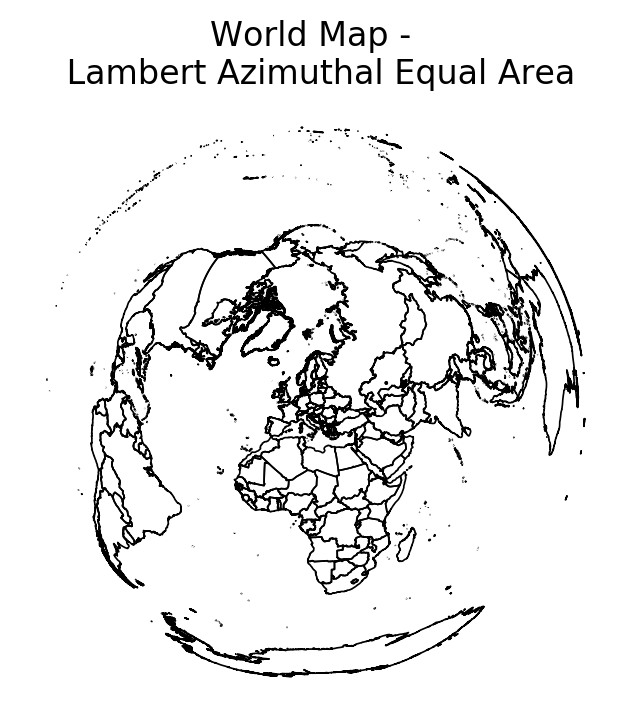

In [14]:
f, ax = plt.subplots(dpi = 200)
countries_2.plot(edgecolor = 'k', facecolor = 'None', linewidth = 0.6, ax = ax)
ax.set_title('World Map - \n Lambert Azimuthal Equal Area')

.to_crs({'init': 'epsg:3035'})
ax.set_axis_off()

## Chloropleths

Maps with color-coding based on value in table

+ scheme=None—A continuous colormap.
+ scheme=”Quantiles”—Bins the data such that the bins contain equal numbers of samples.
+ scheme=”EqualInterval”—Bins the data such that bins are of equal length.
+ scheme=”FisherJenks”—Bins the data using the Fisher natural breaks optimization procedure.

(Example from geoplots gallery)

Text(0.5, 1.0, 'scheme=None')

Text(0.5, 1.0, 'scheme="Quantiles"')

Text(0.5, 1.0, 'scheme="EqualInterval"')

Text(0.5, 1.0, 'scheme="FisherJenks"')

Text(0.5, 0.98, 'California State Districts by Area, 2010')

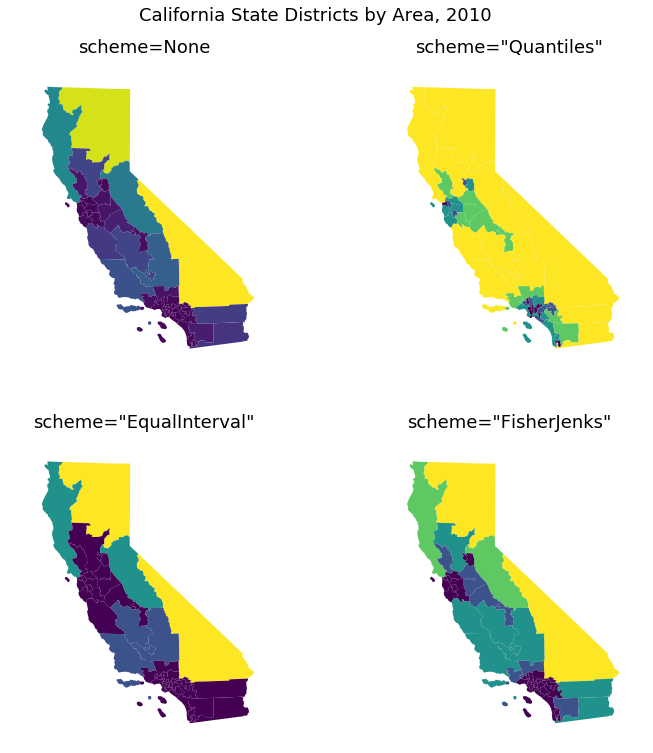

In [42]:
cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
cali['area'] =cali.geometry.area

proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944)
fig, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=None, ax=axarr[0][0]
)
axarr[0][0].set_title('scheme=None', fontsize=18)

scheme = mc.Quantiles(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[0][1]
)
axarr[0][1].set_title('scheme="Quantiles"', fontsize=18)

scheme = mc.EqualInterval(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][0]
)
axarr[1][0].set_title('scheme="EqualInterval"', fontsize=18)

scheme = mc.FisherJenks(cali.area, k=5)
gplt.choropleth(
    cali, hue='area', linewidth=0, scheme=scheme, ax=axarr[1][1]
)
axarr[1][1].set_title('scheme="FisherJenks"', fontsize=18)

plt.subplots_adjust(top=0.92)
plt.suptitle('California State Districts by Area, 2010', fontsize=18)

## Spatial Merge

Subset to Africa

In [44]:
afr = countries.loc[countries.CONTINENT == 'Africa']

Subset cities by merging with African boundaries

In [51]:
afr_cities = gpd.sjoin(cities, afr, how='inner')

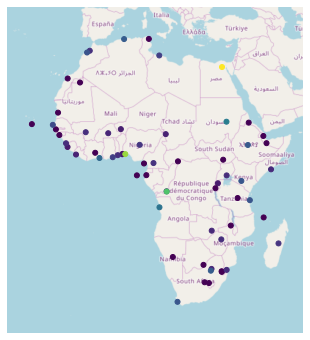

In [55]:
ax = gplt.webmap(afr, projection=gplt.crs.WebMercator())
gplt.pointplot(afr_cities, ax=ax, hue = 'POP2015')

# Raster Data 